In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import utils
from generator import Generator
import numpy as np
import matplotlib.pyplot as plt

# CIFAR

#### Create an object of class Generator
The Generator class contains functionality to help generate adversarial images, such as
- Generate adversarial images for a batch with the fool() method
- Experiment with the parameters of the fool() method with the fool_calibrate() method
- Visualize generated adversarial images from a random batch with _visualize() method, which is located inside fool_calibrate()

In [ ]:
cifar_adv = Generator('cifar')

In [ ]:
cifar_adv.fool_calibrate(target=5, epsilon=5e-3, num_iters=40, verbose=True)
# Try adjusting the epsilon parameter above; it's set to a really high number to
# make the adversarial images easily distinguishable to the human eye

# MNIST

In [3]:
mnist_adv = Generator('mnist')

Target = 5
Took 2.86 seconds
Number in batch that model successfully predicts: 48/50
Number that terminated before max number of iterations: 26/50
Number successfully fooled: 27/50
Number with small enough perturbation: 26/50



Original Label: 9
Model prediction: 5


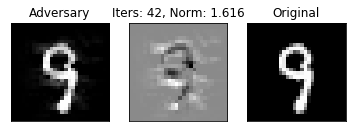



Original Label: 0
Model prediction: 5


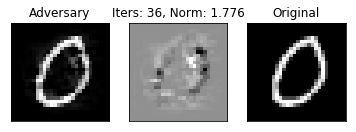



Original Label: 6
Model prediction: 5


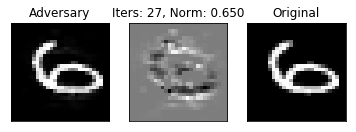



Original Label: 9
Model prediction: 5


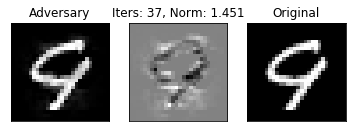



Original Label: 2
Model prediction: 5


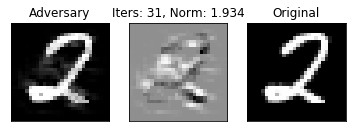



Original Label: 3
Model prediction: 5


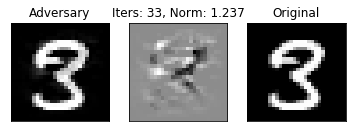



Original Label: 2
Model prediction: 5


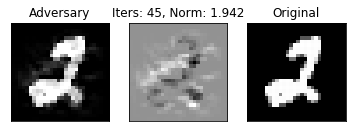



Original Label: 9
Model prediction: 5


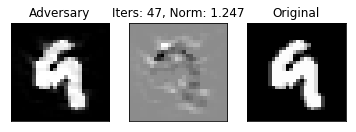



Original Label: 6
Model prediction: 5


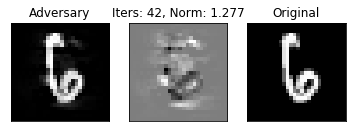



Original Label: 3
Model prediction: 5


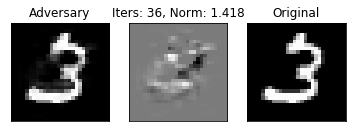



Original Label: 4
Model prediction: 5


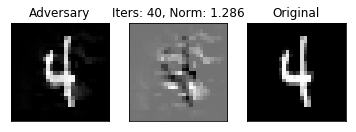



Original Label: 8
Model prediction: 5


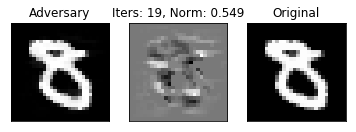



Original Label: 6
Model prediction: 5


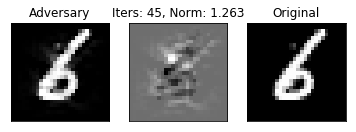



Original Label: 3
Model prediction: 5


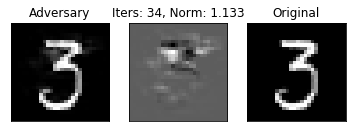



Original Label: 9
Model prediction: 5


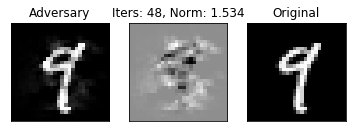



Original Label: 1
Model prediction: 5


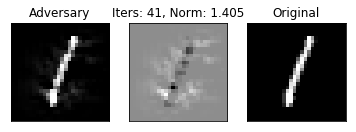



Original Label: 6
Model prediction: 5


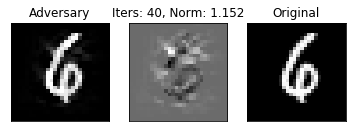



Original Label: 1
Model prediction: 5


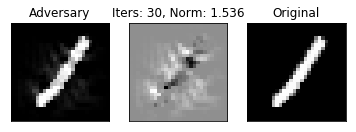



Original Label: 3
Model prediction: 5


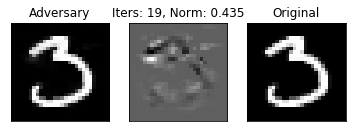



Original Label: 7
Model prediction: 5


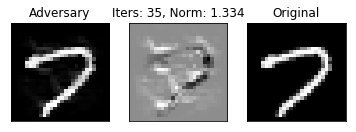



Original Label: 3
Model prediction: 5


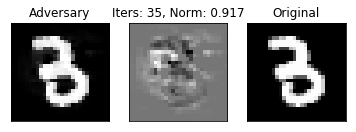



Original Label: 3
Model prediction: 5


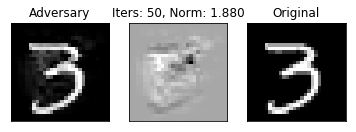



Original Label: 7
Model prediction: 5


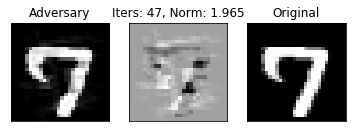



Original Label: 3
Model prediction: 5


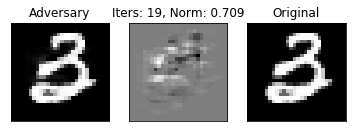



Original Label: 3
Model prediction: 5


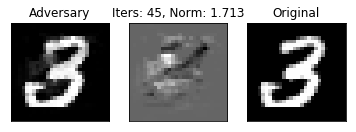



Original Label: 2
Model prediction: 5


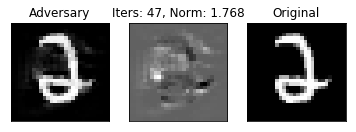

In [74]:
target = np.random.randint(0,10,1).item()
print('Target = {}'.format(target))
mnist_adv.fool_calibrate(target=target, epsilon=5e-3, num_iters=50, max_L2_norm=2.0, verbose=True)

# Create a dataset of adversarial images
The make_dataset() method inside the Adversarial_utils class will create a dataset of adversarial images. The data stored will contained the following for each example:
- The original image
- The perturbation added to the image
- The adversarial image
- The original label for the image
- The label for the class that the model gets tricked into predicting

#### MNIST

In [ ]:
file_name = 'mnist_eps_5e-3_norm_2_num_iters_50'
mnist_adv.make_dataset(file_name, num_examples=10000, num_iters=50, epsilon=5e-3, max_L2_norm=2.0)

Starting first batch...
Finished batch 1. Generated 22/10000 images
Finished batch 2. Generated 45/10000 images
Finished batch 3. Generated 69/10000 images
Finished batch 4. Generated 92/10000 images
Finished batch 5. Generated 118/10000 images
Finished batch 6. Generated 137/10000 images
Finished batch 7. Generated 156/10000 images
Finished batch 8. Generated 176/10000 images
Finished batch 9. Generated 198/10000 images
Finished batch 10. Generated 217/10000 images
Finished batch 11. Generated 235/10000 images
Finished batch 12. Generated 253/10000 images
Finished batch 13. Generated 278/10000 images
Finished batch 14. Generated 295/10000 images
Finished batch 15. Generated 316/10000 images
Finished batch 16. Generated 332/10000 images
Finished batch 17. Generated 354/10000 images
Finished batch 18. Generated 374/10000 images
Finished batch 19. Generated 396/10000 images
Finished batch 20. Generated 417/10000 images
Finished batch 21. Generated 442/10000 images
Finished batch 22. Gene

Finished batch 175. Generated 3670/10000 images
Finished batch 176. Generated 3689/10000 images
Finished batch 177. Generated 3708/10000 images
Finished batch 178. Generated 3730/10000 images
Finished batch 179. Generated 3753/10000 images
Finished batch 180. Generated 3773/10000 images
Finished batch 181. Generated 3792/10000 images
Finished batch 182. Generated 3812/10000 images
Finished batch 183. Generated 3830/10000 images
Finished batch 184. Generated 3852/10000 images
Finished batch 185. Generated 3866/10000 images
Finished batch 186. Generated 3889/10000 images
Finished batch 187. Generated 3911/10000 images
Finished batch 188. Generated 3926/10000 images
Finished batch 189. Generated 3946/10000 images
Finished batch 190. Generated 3969/10000 images
Finished batch 191. Generated 3993/10000 images
Finished batch 192. Generated 4019/10000 images
Finished batch 193. Generated 4036/10000 images
Finished batch 194. Generated 4058/10000 images
Finished batch 195. Generated 4078/10000

#### CIFAR

In [ ]:
file_name = 'cifar_eps_5e-3'
cifar_adv.make_dataset(file_name, num_examples=1000, num_iters=40, epsilon=5e-3, max_L2_norm=None)

# Load a dataset of adversarial images
The get_adv_data() function inside utils.py will load a Pytorch dataloader object containing data for an existing dataset of adversarial images.

### MNIST

In [ ]:
adv_data = utils.get_adv_data(file_name, original_label=1, target_label=8)

#### Plot a few examples

In [ ]:
sample_batch = iter(adv_data).next()

originals = sample_batch[0]
adversaries = sample_batch[2]

for i in range(20):
    plt.subplot(1,2,1)
    plt.imshow(originals[i][0].numpy())
    plt.title('Original')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1,2,2)
    plt.imshow(adversaries[i][0].numpy())
    plt.title('Adversary')
    plt.xticks([])
    plt.yticks([])
    plt.show()

### CIFAR

In [ ]:
adv_data = utils.get_adv_data('cifar_eps_5e-3', original_label=1, target_label=9)

#### Plot a few examples

In [ ]:
sample_batch = iter(adv_data).next()

originals = sample_batch[0]
adversaries = sample_batch[2]

for i in range(20):
    plt.subplot(1,2,1)
    plt.imshow(originals[i].numpy().transpose((1,2,0)))
    plt.title('Original')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1,2,2)
    plt.imshow(adversaries[i].numpy().transpose((1,2,0)))
    plt.title('Adversary')
    plt.xticks([])
    plt.yticks([])
    plt.show()